# NYC Residential Housing Property Sales (2019-2023) End-to-End Data Pipeline Run Report
By Yue Ru (Norton) Li and Muling Wu
<br> Nortonlyr@gmail.com
<br> Run the notebook in the Google Colab Environment

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
## if you want to upload your own logo, uncomment this cell
# from google.colab import files
# uploaded = files.upload()

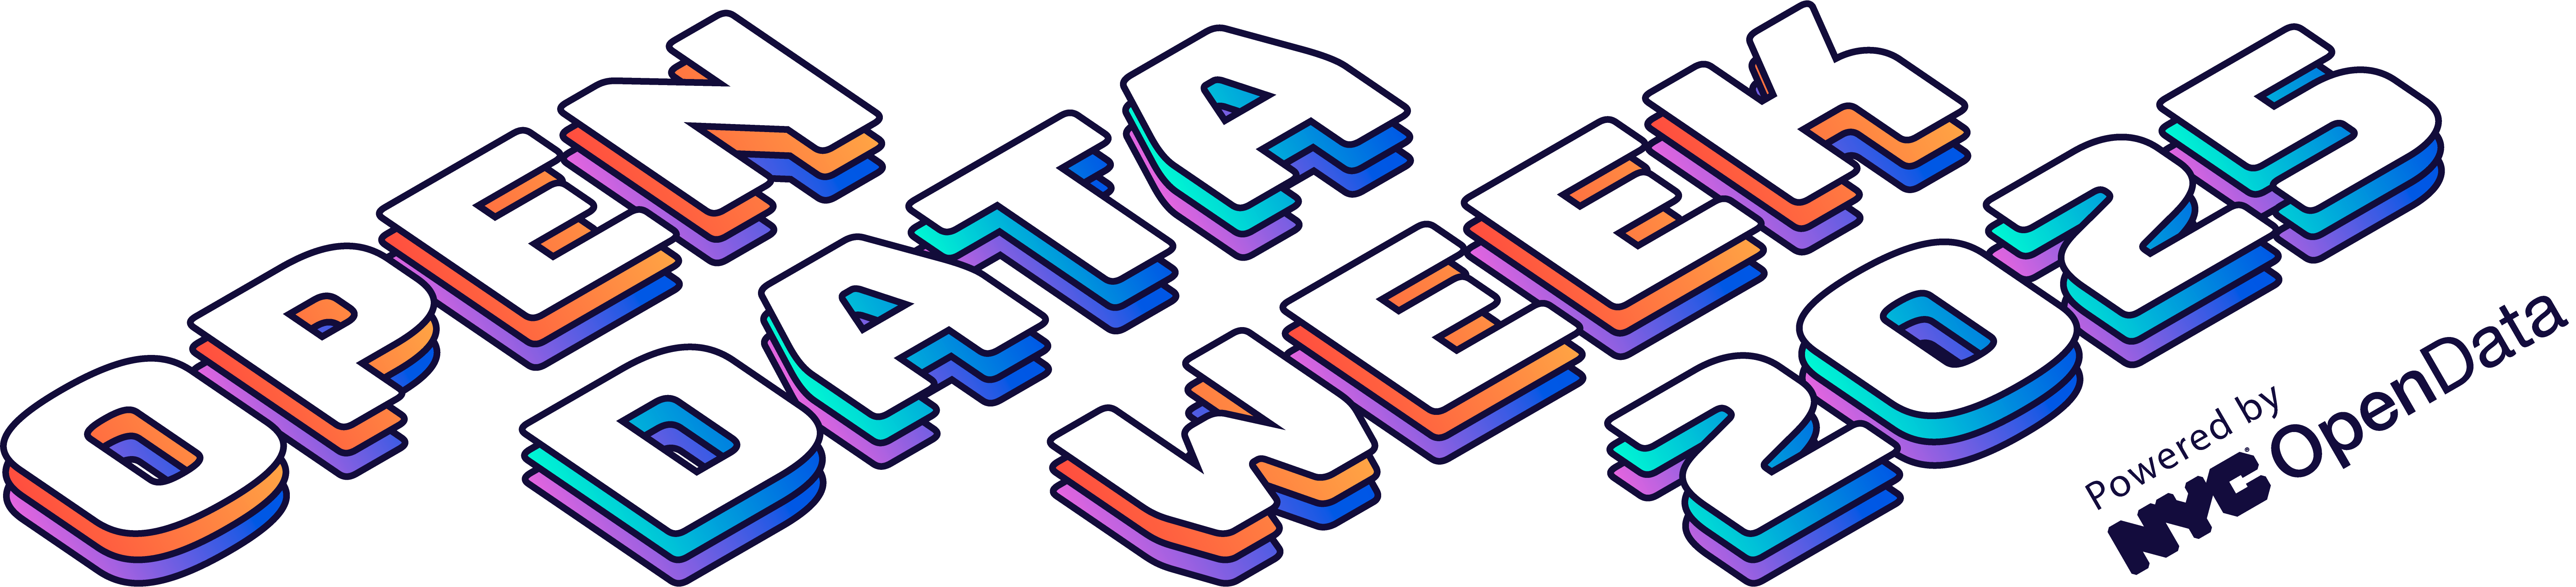

In [91]:
# just for loading the event logo
from PIL import Image
import IPython.display as display
img = Image.open("/content/drive/My Drive/Colab Notebooks/Open_Data/NYC-Dept-Finance-Data/NYC_2025_Dark_1.png")  # Replace with your file name
display.display(img)

# Data Source Collection
#### Combine all the segment dataset from NYC Dept of Finance Website
#### reference: https://www.nyc.gov/site/finance/property/property-annualized-sales-update.page
#### https://www.nyc.gov/site/finance/property/definitions-of-property-assessment-terms.page#

In [92]:
## Only need to combine once
## google colab default storage location: /content/drive/My Drive/Colab Notebooks/

# import os
# # Change to the directory where the notebook is saved
# os.chdir('/content/drive/My Drive/Colab Notebooks/Open_Data/NYC-Dept-Finance-Data')

# import os
# import pandas as pd

# # Specify the folder path where your Excel files are located
# folder_path = '/content/drive/My Drive/Colab Notebooks/Open_Data/NYC-Dept-Finance-Data'

# # Get a list of all Excel files in the folder
# file_list = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# # Initialize an empty list to hold DataFrames
# dfs = []

# # Loop through the file list and read each Excel file
# for file in file_list:
#     file_path = os.path.join(folder_path, file)  # Construct full file path
#     df = pd.read_excel(file_path,header=6)  # Read the Excel file into a DataFrame
#     df.columns = df.columns.str.replace('\n', ' ').str.strip().str.replace(' ', '_')

#     df = df.loc[:, ~df.columns.duplicated()]
#     dfs.append(df)  # Append the DataFrame to the list
# # print(dfs)
# # Combine all DataFrames in the list into one large DataFrame
# combined_df_2019_2023 = pd.concat(dfs, ignore_index=True)

# combined_df_2019_2023.head()

In [93]:
# combined_df_2019_2023 = combined_df_2019_2023.drop(index=0).reset_index(drop=True)
# combined_df_2019_2023.head()

# combined_df_2019_2023.to_csv(f'{folder_path}/nyc_property_sale_2019-2023.csv', index=False)  # Save to CSV

# Exploratory Data Analysis (EDA) - Data Wrangling

In [94]:
import pandas as pd

import os
# Change to the directory where the notebook is saved
folder_path = '/content/drive/My Drive/Colab Notebooks/Open_Data/NYC-Dept-Finance-Data'
os.chdir(folder_path)
pd.set_option('display.max_columns', None)

# Data source: https://www.nyc.gov/site/finance/property/property-annualized-sales-update.page
file = 'nyc_property_sale_2019-2023.csv'
nyc_sales_df = pd.read_csv(file)

In [95]:
nyc_sales_df.head()

BOROUGH   NEIGHBORHOOD         BUILDING_CLASS_CATEGORY  \
0      1.0  ALPHABET CITY         02 TWO FAMILY DWELLINGS   
1      1.0  ALPHABET CITY         02 TWO FAMILY DWELLINGS   
2      1.0  ALPHABET CITY         02 TWO FAMILY DWELLINGS   
3      1.0  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS   
4      1.0  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS   

  TAX_CLASS_AT_PRESENT  BLOCK   LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
0                    1  372.0  36.0        NaN                        S2   
1                    1  386.0   7.0        NaN                        S2   
2                    1  386.0   8.0        NaN                        S2   
3                   2A  376.0  25.0        NaN                        C3   
4                    2  376.0  41.0        NaN                        C4   

                   ADDRESS APARTMENT_NUMBER  ZIP_CODE  RESIDENTIAL_UNITS  \
0              19 AVENUE D              NaN   10009.0                2.0   
1              49 AVENUE B              NaN   10009.0                2.0   
2              51 AVENUE B              NaN   10009.0                2.0   
3             266 EAST 7TH              NaN   10009.0                4.0   
4  745 EAST 6TH STREET, 3D              NaN   10009.0               28.0   

   COMMERCIAL_UNITS  TOTAL__UNITS  LAND__SQUARE_FEET  GROSS__SQUARE_FEET  \
0               1.0           3.0              826.0              2481.0   
1               1.0           3.0             1725.0              2304.0   
2               1.0           3.0             1530.0              1920.0   
3               0.0           4.0             2059.0              3764.0   
4               0.0          28.0             4542.0             18254.0   

   YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE BUILDING_CLASS_AT_TIME_OF_SALE  \
0      1900.0                        1.0                             S2   
1      1880.0                        1.0                             S2   
2      1880.0                        1.0                             S2   
3      1900.0                        2.0                             C3   
4      1900.0                        2.0                             C4   

   SALE_PRICE   SALE_DATE  
0         1.0  2023-01-20  
1         0.0  2023-11-02  
2         0.0  2023-11-02  
3         0.0  2023-11-09  
4    625000.0  2023-12-13

In [96]:
nyc_sales_df.shape

(421551, 21)

In [97]:
nyc_sales_df.TAX_CLASS_AT_TIME_OF_SALE.value_counts()

TAX_CLASS_AT_TIME_OF_SALE
1.0    208914
2.0    185408
4.0     27210
Name: count, dtype: int64

In [98]:
nyc_sales_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL__UNITS',
       'LAND__SQUARE_FEET', 'GROSS__SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

### Check the data type for each column

In [99]:
nyc_sales_df.dtypes.rename("data_type").reset_index().rename(columns={"index": "column_name"})

column_name data_type
0                          BOROUGH   float64
1                     NEIGHBORHOOD    object
2          BUILDING_CLASS_CATEGORY    object
3             TAX_CLASS_AT_PRESENT    object
4                            BLOCK   float64
5                              LOT   float64
6                        EASE-MENT   float64
7        BUILDING_CLASS_AT_PRESENT    object
8                          ADDRESS    object
9                 APARTMENT_NUMBER    object
10                        ZIP_CODE   float64
11               RESIDENTIAL_UNITS   float64
12                COMMERCIAL_UNITS   float64
13                    TOTAL__UNITS   float64
14               LAND__SQUARE_FEET   float64
15              GROSS__SQUARE_FEET   float64
16                      YEAR_BUILT   float64
17       TAX_CLASS_AT_TIME_OF_SALE   float64
18  BUILDING_CLASS_AT_TIME_OF_SALE    object
19                      SALE_PRICE   float64
20                       SALE_DATE    object

### This Study only foucs on the Residential Tax class (Class 1: Most residential property of up to three units (including family homes and small stores or offices with one or two apartments attached), and most condominiums that are not more than three stories.)

In [100]:
nyc_sales_df_2 = nyc_sales_df[nyc_sales_df['TAX_CLASS_AT_TIME_OF_SALE'] == 1.0]
# nyc_sales_df_2 = nyc_sales_df[nyc_sales_df['TAX_CLASS_AT_TIME_OF_SALE'].isin([1.0, 2.0])]

In [101]:
nyc_sales_df_2.shape

(208914, 21)

### Check the missing value (NaN) for each column

In [102]:
nyc_sales_df_2.isnull().sum().to_frame(name="missing_value").reset_index().rename(columns={"index": "column_name"})

column_name  missing_value
0                          BOROUGH              0
1                     NEIGHBORHOOD              0
2          BUILDING_CLASS_CATEGORY              0
3             TAX_CLASS_AT_PRESENT             26
4                            BLOCK              0
5                              LOT              0
6                        EASE-MENT         208914
7        BUILDING_CLASS_AT_PRESENT             26
8                          ADDRESS              0
9                 APARTMENT_NUMBER         201937
10                        ZIP_CODE             32
11               RESIDENTIAL_UNITS            720
12                COMMERCIAL_UNITS           5960
13                    TOTAL__UNITS            720
14               LAND__SQUARE_FEET           5960
15              GROSS__SQUARE_FEET           5960
16                      YEAR_BUILT           7269
17       TAX_CLASS_AT_TIME_OF_SALE              0
18  BUILDING_CLASS_AT_TIME_OF_SALE              0
19                      SALE_PRICE              0
20                       SALE_DATE              0

### Describe numerical data columns

In [103]:
nyc_sales_df_2.describe()

BOROUGH          BLOCK            LOT  EASE-MENT       ZIP_CODE  \
count  208914.000000  208914.000000  208914.000000        0.0  208882.000000   
mean        3.643289    5815.052648     112.441019        NaN   11028.777611   
std         0.931307    3719.768966     292.874508        NaN     455.621312   
min         1.000000       3.000000       1.000000        NaN   10001.000000   
25%         3.000000    3050.000000      21.000000        NaN   10466.000000   
50%         4.000000    5395.000000      42.000000        NaN   11223.000000   
75%         4.000000    7967.000000      70.000000        NaN   11374.000000   
max         5.000000   16350.000000    6960.000000        NaN   11697.000000   

       RESIDENTIAL_UNITS  COMMERCIAL_UNITS   TOTAL__UNITS  LAND__SQUARE_FEET  \
count      208194.000000     202954.000000  208194.000000       2.029540e+05   
mean            1.569469          0.026868       1.595661       3.104466e+03   
std             1.222245          0.163788       1.238341       5.833656e+03   
min             0.000000          0.000000       0.000000       0.000000e+00   
25%             1.000000          0.000000       1.000000       2.000000e+03   
50%             1.000000          0.000000       1.000000       2.500000e+03   
75%             2.000000          0.000000       2.000000       3.900000e+03   
max           371.000000          3.000000     372.000000       1.150244e+06   

       GROSS__SQUARE_FEET     YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE  \
count       202954.000000  201645.000000                   208914.0   
mean          1926.517541    1943.835944                        1.0   
std            984.782882      31.522440                        0.0   
min              0.000000    1018.000000                        1.0   
25%           1312.000000    1920.000000                        1.0   
50%           1800.000000    1935.000000                        1.0   
75%           2414.000000    1960.000000                        1.0   
max          57106.000000    2023.000000                        1.0   

         SALE_PRICE  
count  2.089140e+05  
mean   5.667079e+05  
std    1.262821e+06  
min    0.000000e+00  
25%    0.000000e+00  
50%    4.450000e+05  
75%    8.030000e+05  
max    1.108250e+08

### Convert 'Borough' value from float to string



In [104]:
nyc_sales_df_2["BOROUGH"] = nyc_sales_df_2["BOROUGH"].astype(int)
nyc_sales_df_2["BOROUGH"] = nyc_sales_df_2["BOROUGH"].astype(str)

/tmp/ipython-input-1069664842.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1069664842.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Convert 'BLOCK' and 'LOT' value from float to int

In [105]:
cols_to_int = ['BLOCK', 'LOT']
nyc_sales_df_2[cols_to_int] = nyc_sales_df_2[cols_to_int].astype(int)

/tmp/ipython-input-1592782207.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Convert 'YEAR_BUILT' and 'LOT' value from float to int, but keep the NaN remain in the columns

In [106]:
cols_to_int_coerce = ['YEAR_BUILT', 'ZIP_CODE', 'APARTMENT_NUMBER', 'TAX_CLASS_AT_TIME_OF_SALE', 'TOTAL__UNITS', 'COMMERCIAL_UNITS']
nyc_sales_df_2[cols_to_int_coerce] = nyc_sales_df_2[cols_to_int_coerce].\
                                      apply(lambda x: pd.to_numeric(x, errors='coerce')).\
                                        astype('Int64')

/tmp/ipython-input-1216550606.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
nyc_sales_df_2['sale_year'] = nyc_sales_df_2['SALE_DATE'].str[:4]
# nyc_sales_df_2['sale_year'] = nyc_sales_df_2['SALE_DATE'].loc[:4]

/tmp/ipython-input-1437510143.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
nyc_sales_df_2.head()

BOROUGH   NEIGHBORHOOD  BUILDING_CLASS_CATEGORY TAX_CLASS_AT_PRESENT  \
0         1  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   
1         1  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   
2         1  ALPHABET CITY  02 TWO FAMILY DWELLINGS                    1   
122       1        CHELSEA  01 ONE FAMILY DWELLINGS                    1   
123       1        CHELSEA  01 ONE FAMILY DWELLINGS                    1   

     BLOCK  LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT               ADDRESS  \
0      372   36        NaN                        S2           19 AVENUE D   
1      386    7        NaN                        S2           49 AVENUE B   
2      386    8        NaN                        S2           51 AVENUE B   
122    719    1        NaN                        A4  473 WEST 21ST STREET   
123    742   45        NaN                        A9  310 WEST 19TH STREET   

     APARTMENT_NUMBER  ZIP_CODE  RESIDENTIAL_UNITS  COMMERCIAL_UNITS  \
0                <NA>     10009                2.0                 1   
1                <NA>     10009                2.0                 1   
2                <NA>     10009                2.0                 1   
122              <NA>     10011                1.0                 0   
123              <NA>     10011                1.0                 0   

     TOTAL__UNITS  LAND__SQUARE_FEET  GROSS__SQUARE_FEET  YEAR_BUILT  \
0               3              826.0              2481.0        1900   
1               3             1725.0              2304.0        1880   
2               3             1530.0              1920.0        1880   
122             1             1058.0              2960.0        1920   
123             1             1120.0              1728.0        1910   

     TAX_CLASS_AT_TIME_OF_SALE BUILDING_CLASS_AT_TIME_OF_SALE  SALE_PRICE  \
0                            1                             S2         1.0   
1                            1                             S2         0.0   
2                            1                             S2         0.0   
122                          1                             A4         0.0   
123                          1                             A9   1812500.0   

      SALE_DATE sale_year  
0    2023-01-20      2023  
1    2023-11-02      2023  
2    2023-11-02      2023  
122  2023-02-22      2023  
123  2023-10-11      2023

In [109]:
nyc_sales_df_2.BOROUGH.value_counts()
# 1 -> Manhattan
# 2 -> Bronx
# 3 -> Brooklyn
# 4 -> Queens
# 5 -> Staten Island

BOROUGH
4    82698
3    63211
5    38837
2    22356
1     1812
Name: count, dtype: int64

### Mapping with BOROUGH

In [110]:
borough_mapping = {
    '1': "Manhattan",
    '2': "Bronx",
    '3': "Brooklyn",
    '4': "Queens",
    '5': "Staten Island"
}

# Create the new column BOROUGH_NAME using the map function
nyc_sales_df_2["BOROUGH_NAME"] = nyc_sales_df_2["BOROUGH"].map(borough_mapping)

/tmp/ipython-input-1187441076.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
nyc_sales_df_2.NEIGHBORHOOD.value_counts().head(10)

NEIGHBORHOOD
FLUSHING-NORTH        6001
BOROUGH PARK          4318
GREAT KILLS           3789
BAYSIDE               3784
CANARSIE              3716
RICHMOND HILL         3607
EAST NEW YORK         3588
BEDFORD STUYVESANT    3550
FLATBUSH-EAST         3490
ST. ALBANS            3106
Name: count, dtype: int64

In [112]:
nyc_sales_df_2.BUILDING_CLASS_CATEGORY.value_counts().head(10)

BUILDING_CLASS_CATEGORY
01 ONE FAMILY DWELLINGS       93622
02 TWO FAMILY DWELLINGS       78516
03 THREE FAMILY DWELLINGS     22065
04 TAX CLASS 1 CONDOS          8258
05 TAX CLASS 1 VACANT LAND     5663
06 TAX CLASS 1 - OTHER          790
Name: count, dtype: int64

In [113]:
nyc_sales_df_2.YEAR_BUILT.value_counts().head(10)

YEAR_BUILT
1920    23489
1925    18999
1930    18559
1950    12866
1910    10601
1940    10189
1960    10099
1899     7937
1901     7638
1955     7300
Name: count, dtype: Int64

In [114]:
nyc_sales_df_2.SALE_PRICE.value_counts().head(10)

SALE_PRICE
0.0         83070
10.0         3351
650000.0     1441
750000.0     1385
600000.0     1359
700000.0     1329
800000.0     1277
900000.0     1233
850000.0     1210
550000.0     1155
Name: count, dtype: int64

In [115]:
nyc_sales_df_3 = nyc_sales_df_2[(nyc_sales_df_2['SALE_PRICE'] != 0.0) & (nyc_sales_df_2['SALE_PRICE'] != 10.0)]
nyc_sales_df_3.shape

(122493, 23)

### Convert ZIP_CODE from number to string

In [116]:
nyc_sales_df_3['ZIP_CODE'] = nyc_sales_df_3['ZIP_CODE'].astype(str)

/tmp/ipython-input-3632956007.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
nyc_sales_df_3.dtypes.rename("data_type").reset_index().rename(columns={"index": "column_name"})

column_name data_type
0                          BOROUGH    object
1                     NEIGHBORHOOD    object
2          BUILDING_CLASS_CATEGORY    object
3             TAX_CLASS_AT_PRESENT    object
4                            BLOCK     int64
5                              LOT     int64
6                        EASE-MENT   float64
7        BUILDING_CLASS_AT_PRESENT    object
8                          ADDRESS    object
9                 APARTMENT_NUMBER     Int64
10                        ZIP_CODE    object
11               RESIDENTIAL_UNITS   float64
12                COMMERCIAL_UNITS     Int64
13                    TOTAL__UNITS     Int64
14               LAND__SQUARE_FEET   float64
15              GROSS__SQUARE_FEET   float64
16                      YEAR_BUILT     Int64
17       TAX_CLASS_AT_TIME_OF_SALE     Int64
18  BUILDING_CLASS_AT_TIME_OF_SALE    object
19                      SALE_PRICE   float64
20                       SALE_DATE    object
21                       sale_year    object
22                    BOROUGH_NAME    object

# Data Visualization

### Visualization with seaborn

Text(0.5, 1.0, 'Log-Transformed Sale Price Boxplot')

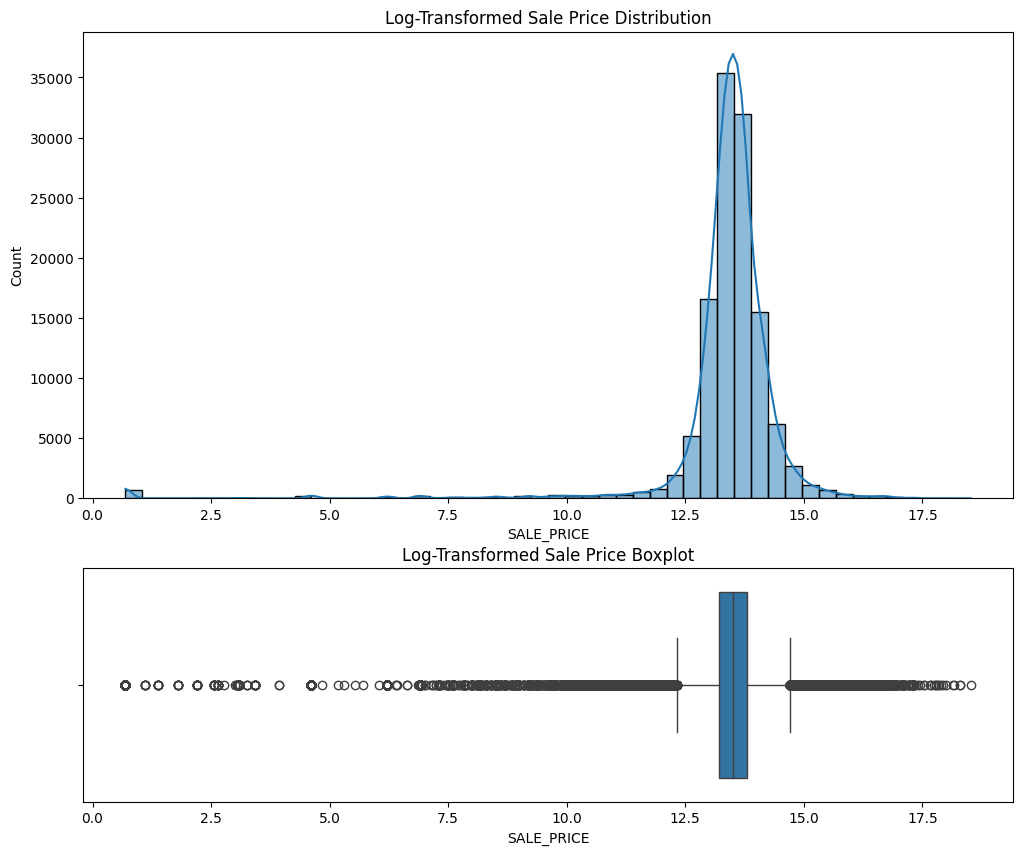

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create figure and subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={"height_ratios": [4, 2]})

# Histogram (log scale)
sns.histplot(np.log1p(nyc_sales_df_3["SALE_PRICE"]), bins=50, kde=True, ax=ax[0])
ax[0].set_title("Log-Transformed Sale Price Distribution")

# Boxplot (aligned below)
sns.boxplot(x=np.log1p(nyc_sales_df_3["SALE_PRICE"]), ax=ax[1])
ax[1].set_title("Log-Transformed Sale Price Boxplot")
# 10.0  ->	$22,026
# 11.0	->	$59,874
#	12.0	->	$162,754
#	13.0	->	$442,412
#	14.0	->	$1,202,603
#	15.0	->	$3,269,018
# 16.0  ->  $8,886,110
# 17.0  ->  $24,154,952
# 18.0  ->  $65,659,968

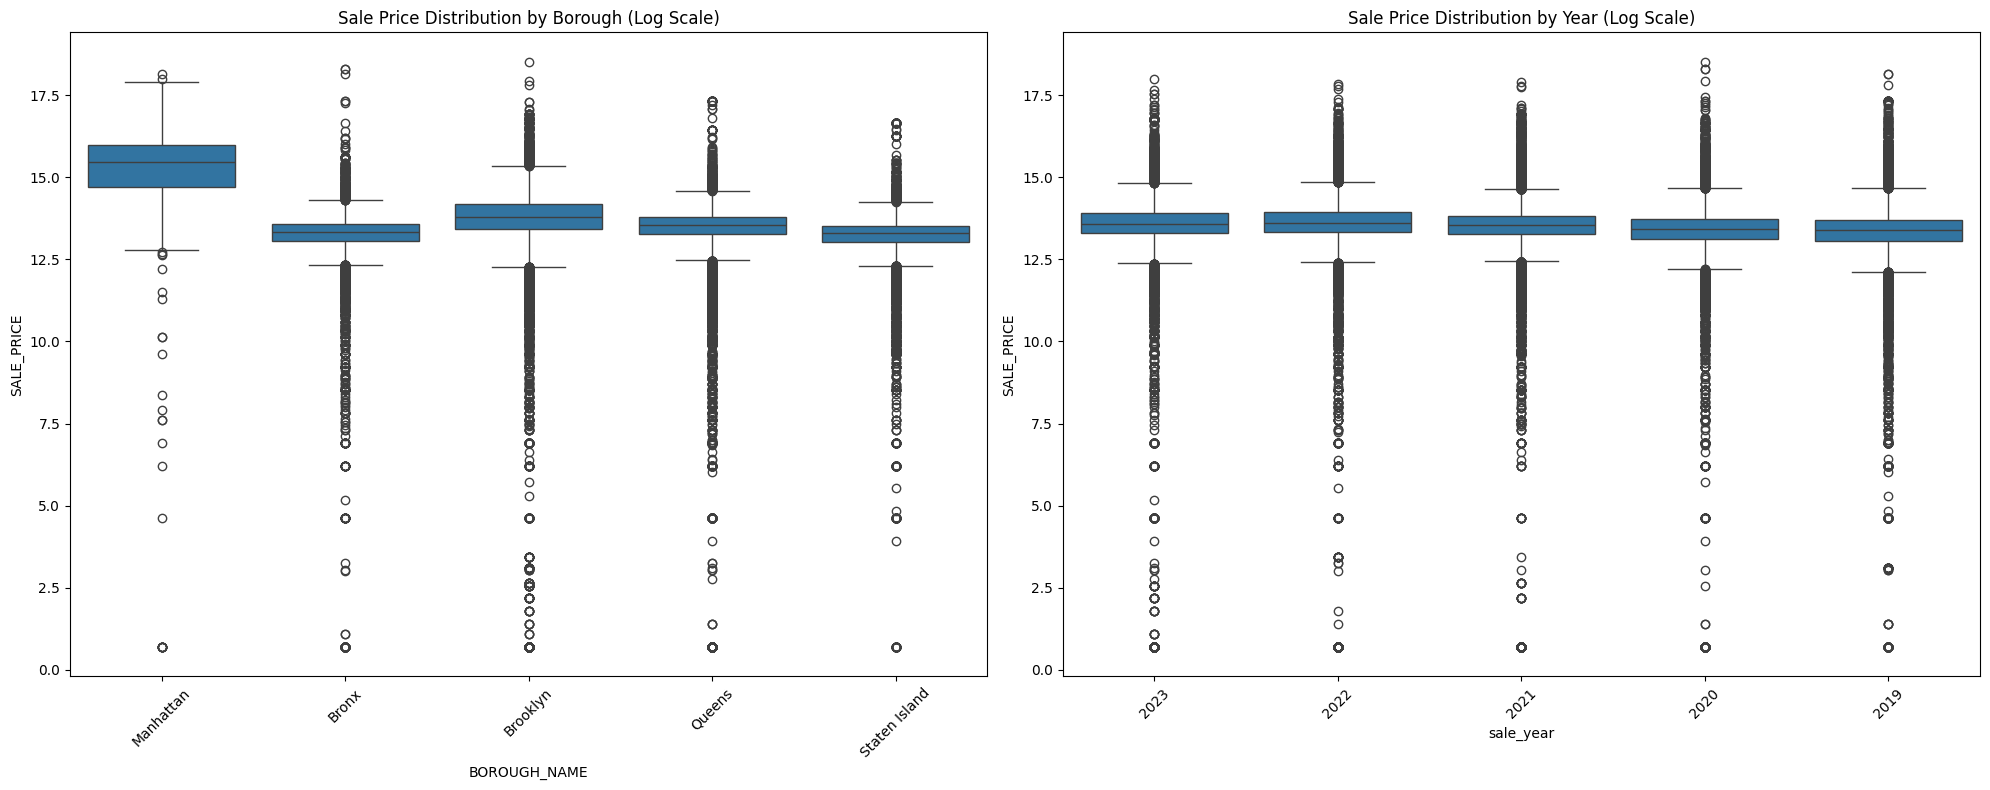

In [119]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Sale Price Distribution by Borough (Log Scale)
sns.boxplot(ax=axes[0], x="BOROUGH_NAME", y=np.log1p(nyc_sales_df_3["SALE_PRICE"]), data=nyc_sales_df_3)
axes[0].set_title("Sale Price Distribution by Borough (Log Scale)")
axes[0].tick_params(axis='x', rotation=45)

# Second subplot: Sale Price Distribution by Year (Log Scale)
sns.boxplot(ax=axes[1], x="sale_year", y=np.log1p(nyc_sales_df_3["SALE_PRICE"]), data=nyc_sales_df_3)
axes[1].set_title("Sale Price Distribution by Year (Log Scale)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
# 10.0  ->	$22,026
# 11.0	->	$59,874
#	12.0	->	$162,754
#	13.0	->	$442,412
#	14.0	->	$1,202,603
#	15.0	->	$3,269,018
# 16.0  ->  $8,886,110
# 17.0  ->  $24,154,952
# 18.0  ->  $65,659,968

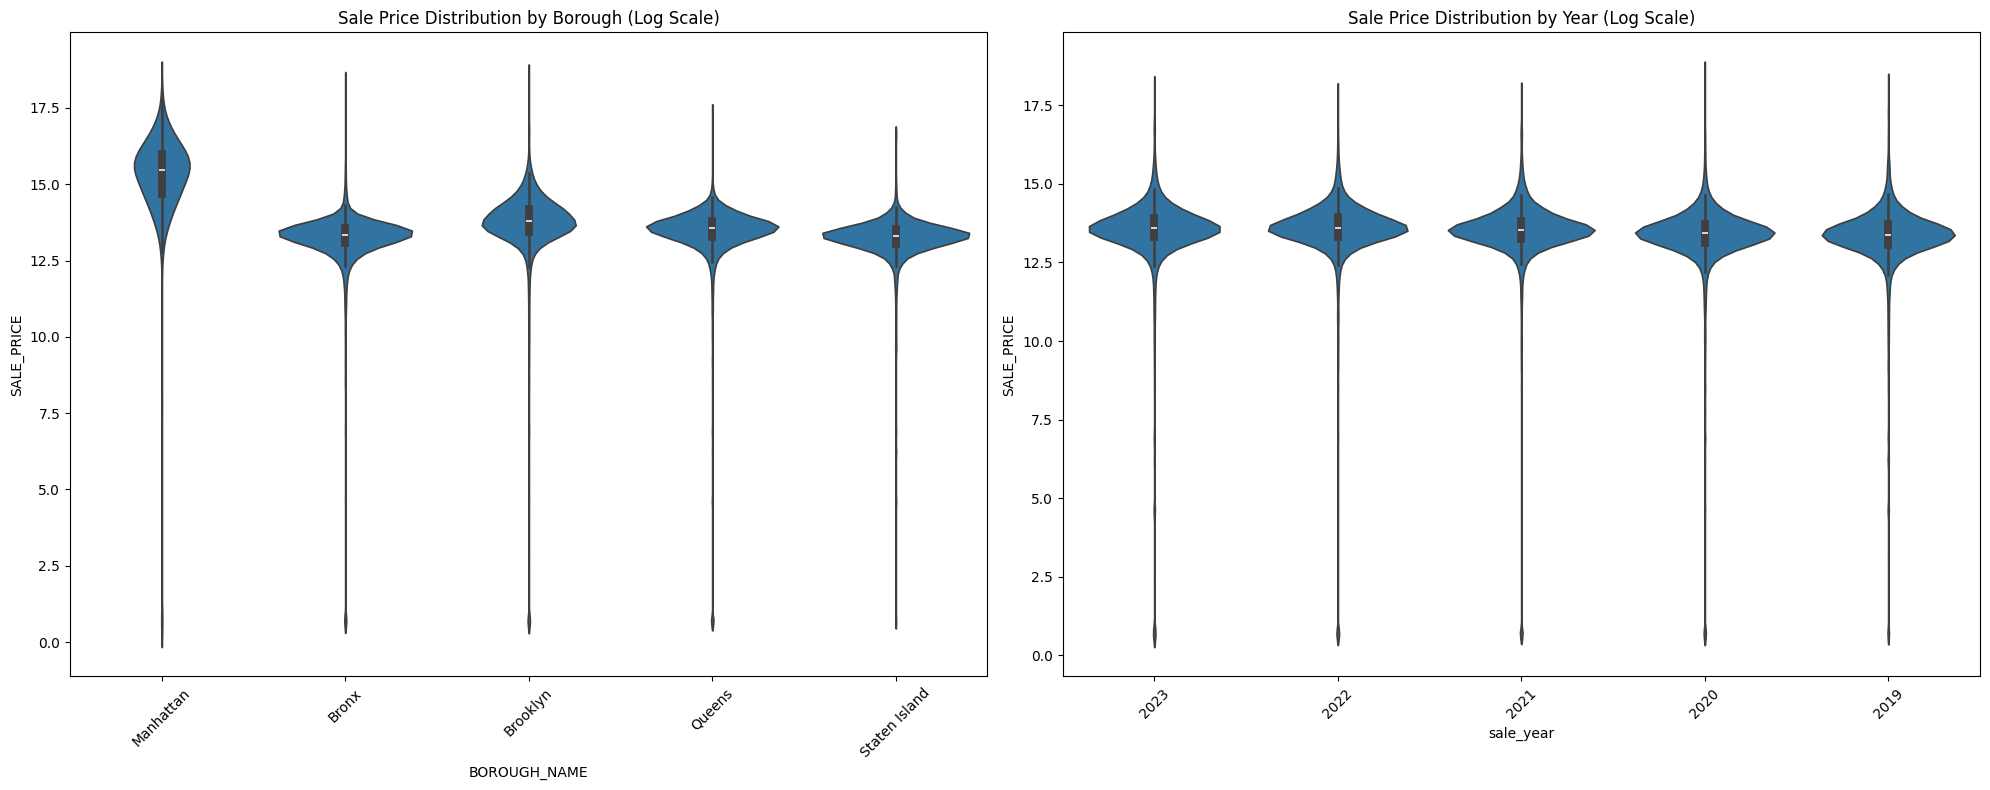

In [120]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Sale Price Distribution by Borough (Log Scale)
sns.violinplot(ax=axes[0], x="BOROUGH_NAME", y=np.log1p(nyc_sales_df_3["SALE_PRICE"]), data=nyc_sales_df_3)
axes[0].set_title("Sale Price Distribution by Borough (Log Scale)")
axes[0].tick_params(axis='x', rotation=45)

# Second subplot: Sale Price Distribution by Year (Log Scale)
sns.violinplot(ax=axes[1], x="sale_year", y=np.log1p(nyc_sales_df_3["SALE_PRICE"]), data=nyc_sales_df_3)
axes[1].set_title("Sale Price Distribution by Year (Log Scale)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
# 10.0  ->	$22,026
# 11.0	->	$59,874
#	12.0	->	$162,754
#	13.0	->	$442,412
#	14.0	->	$1,202,603
#	15.0	->	$3,269,018
# 16.0  ->  $8,886,110
# 17.0  ->  $24,154,952
# 18.0  ->  $65,659,968

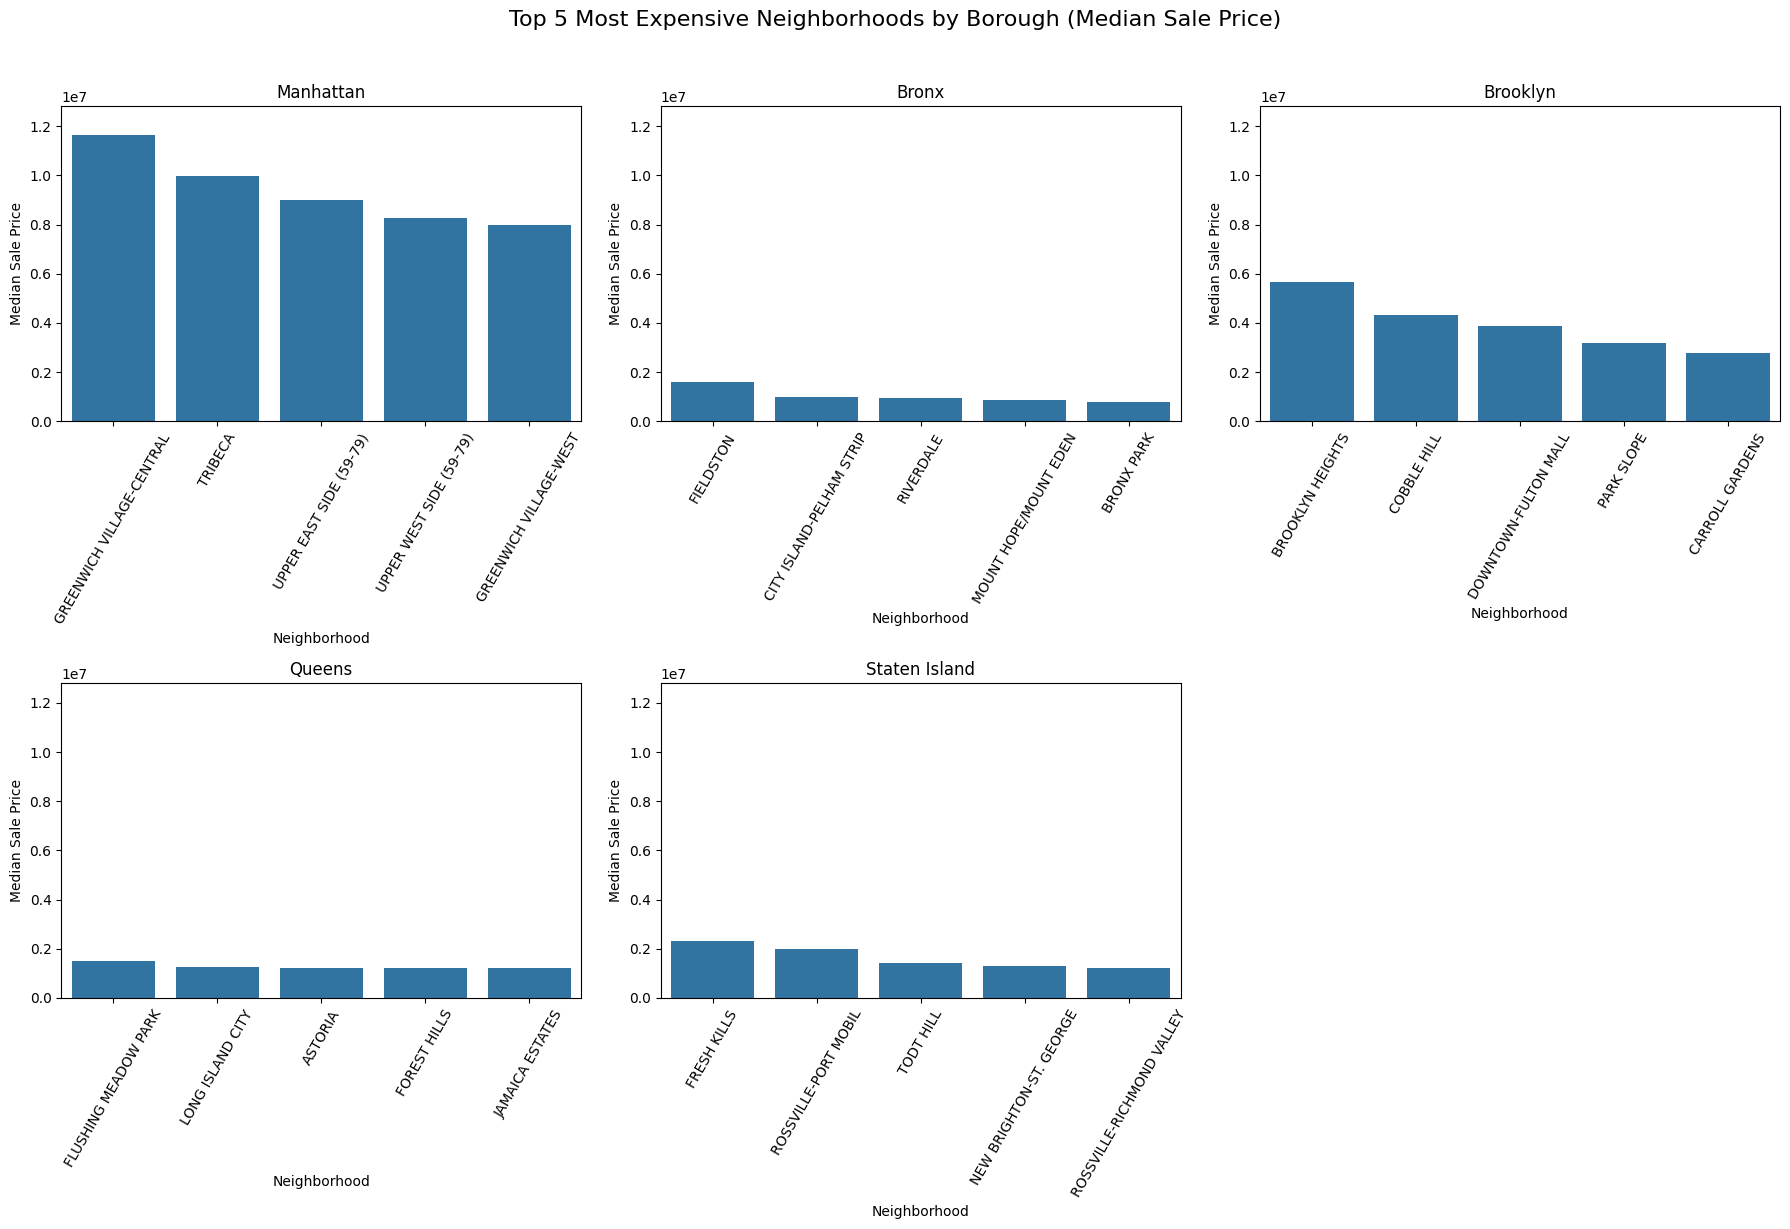

In [121]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Top 5 Most Expensive Neighborhoods by Borough (Median Sale Price)", fontsize=16, y=1.02)

# List of boroughs
boroughs = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]

# Calculate the y-axis limits based on Manhattan's data
manhattan_df = nyc_sales_df_3[nyc_sales_df_3['BOROUGH_NAME'] == "Manhattan"]
manhattan_top_neighborhoods = manhattan_df.groupby("NEIGHBORHOOD")["SALE_PRICE"].median().sort_values(ascending=False).head(5)
y_min = 0  # Start y-axis from 0
y_max = manhattan_top_neighborhoods.max() * 1.1  # Add 10% padding to the max value

# Loop through each borough and create a subplot
for i, borough in enumerate(boroughs):
    # Calculate the row and column index for the subplot
    row = i // 3  # Row index (0, 1)
    col = i % 3   # Column index (0, 1, 2)

    # Filter the DataFrame for the current borough
    borough_df = nyc_sales_df_3[nyc_sales_df_3['BOROUGH_NAME'] == borough]

    # Group by NEIGHBORHOOD and calculate the median SALE_PRICE
    top_neighborhoods = borough_df.groupby("NEIGHBORHOOD")["SALE_PRICE"].median().sort_values(ascending=False).head(5)

    # Create a bar plot for the current borough
    sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, ax=axes[row, col])
    axes[row, col].set_title(f"{borough}", fontsize=12)
    axes[row, col].set_ylabel("Median Sale Price")
    axes[row, col].set_xlabel("Neighborhood")
    axes[row, col].tick_params(axis='x', rotation=60)

    # Set the same y-axis limits for all subplots
    axes[row, col].set_ylim(y_min, y_max)

# Remove the empty subplot (6th subplot)
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

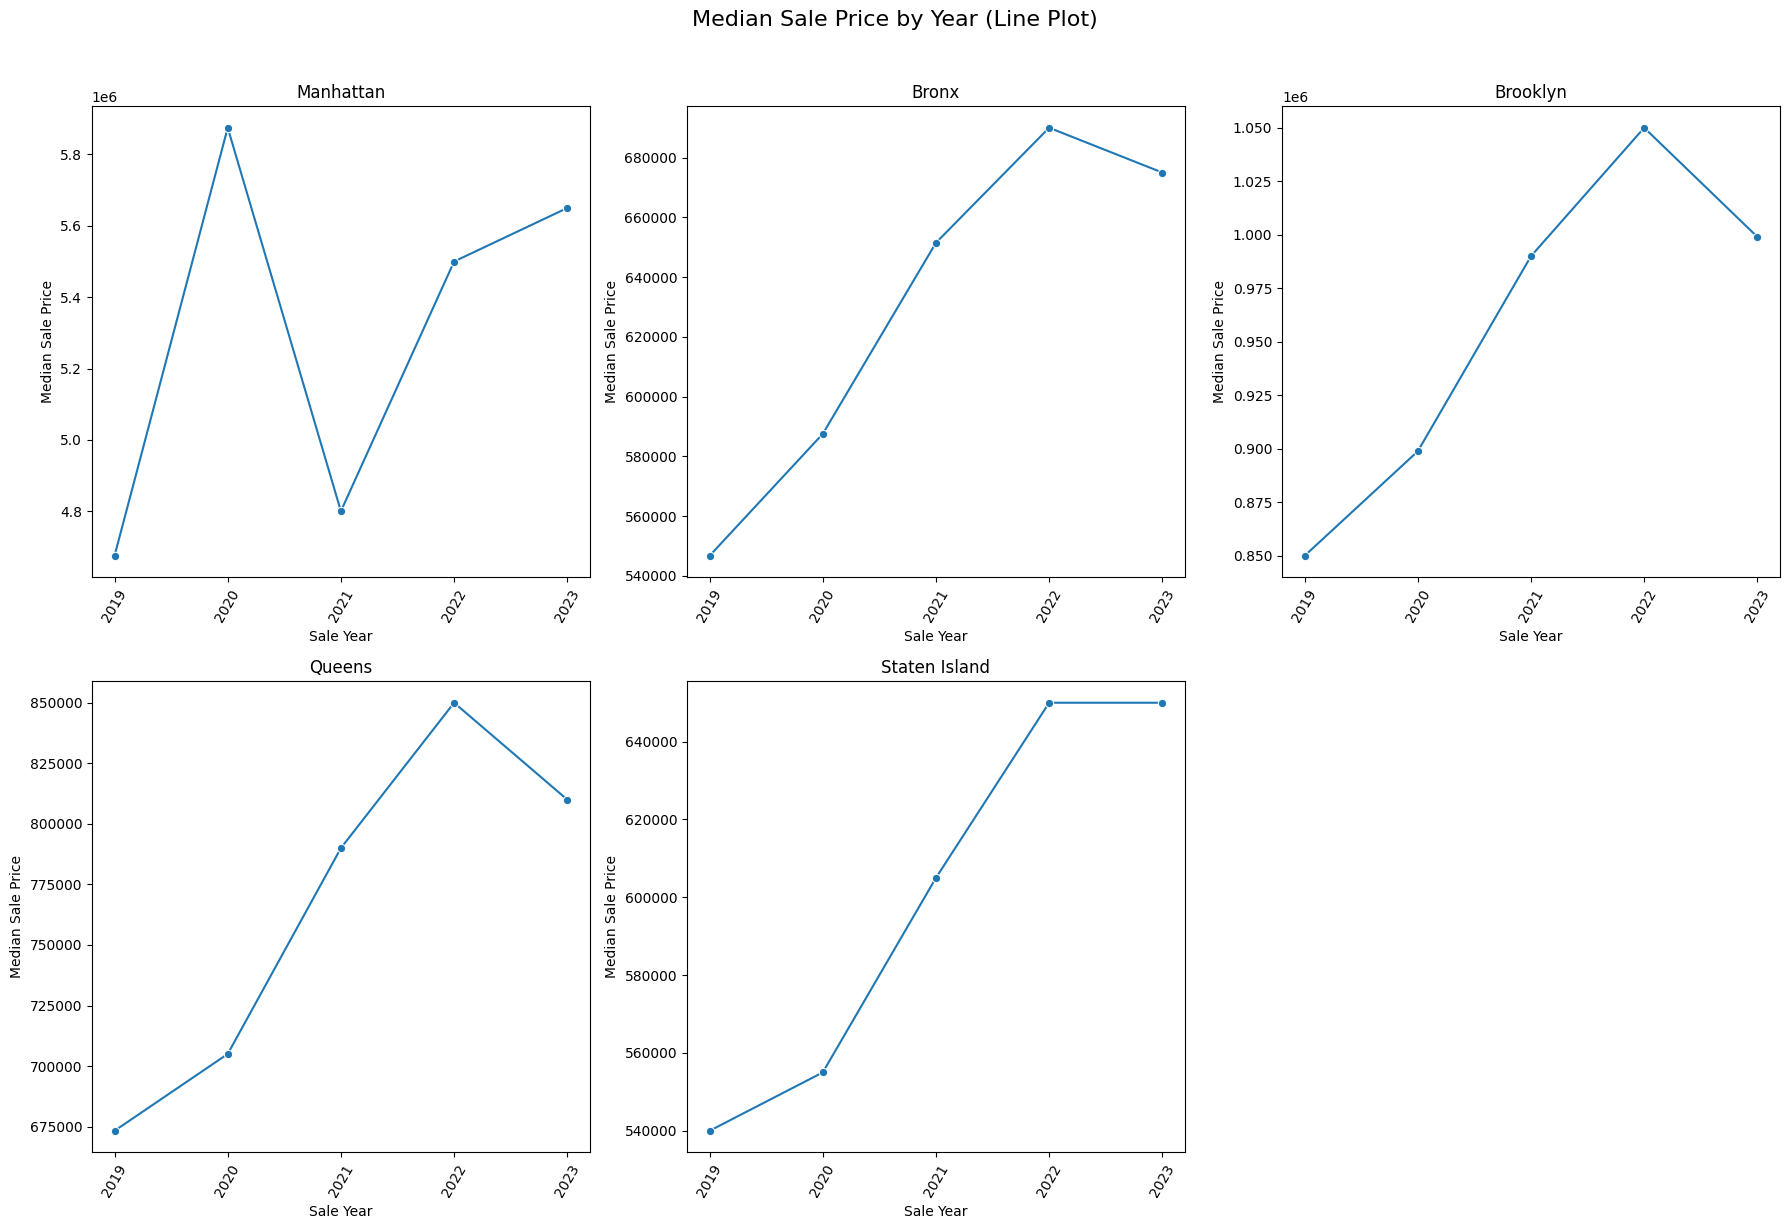

In [122]:
# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Median Sale Price by Year (Line Plot)", fontsize=16, y=1.02)

# List of boroughs (for filtering data by borough)
boroughs = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]

# Calculate the y-axis limits based on the entire dataset's SALE_PRICE
y_min = 0  # Start y-axis from 0
y_max = nyc_sales_df_3["SALE_PRICE"].median() * 10  # Add 10% padding to the max value

# Loop through each borough and create a subplot
for i, borough in enumerate(boroughs):
    # Calculate the row and column index for the subplot
    row = i // 3  # Row index (0, 1)
    col = i % 3   # Column index (0, 1, 2)

    # Filter the DataFrame for the current borough
    borough_df = nyc_sales_df_3[nyc_sales_df_3['BOROUGH_NAME'] == borough]

    # Group by sale_year and calculate the median SALE_PRICE
    yearly_median_prices = borough_df.groupby("sale_year")["SALE_PRICE"].median()

    # Create a line plot for the current borough
    sns.lineplot(x=yearly_median_prices.index, y=yearly_median_prices.values, ax=axes[row, col], marker="o")
    axes[row, col].set_title(f"{borough}", fontsize=12)
    axes[row, col].set_ylabel("Median Sale Price")
    axes[row, col].set_xlabel("Sale Year")
    axes[row, col].tick_params(axis='x', rotation=60)

    # Set the same y-axis limits for all subplots
    # axes[row, col].set_ylim(y_min, y_max)

# Remove the empty subplot (6th subplot)
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

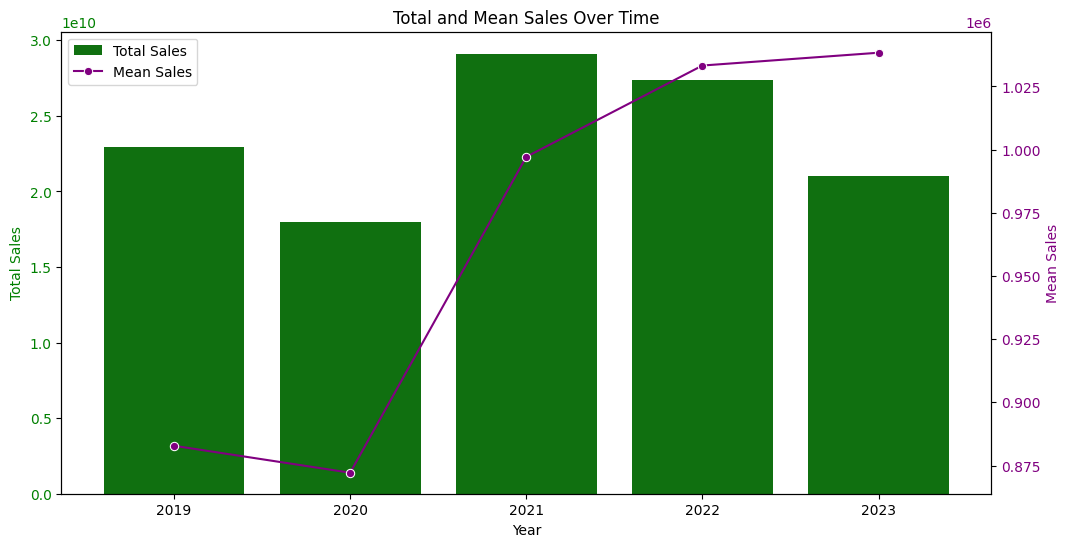

In [123]:
# Calculate the sum and mean sale price per year
yearly_trend = nyc_sales_df_3.groupby('sale_year')['SALE_PRICE'].agg(['sum', 'mean']).reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the total sales (sum) on the first y-axis
sns.barplot(x='sale_year', y='sum', data=yearly_trend, color='green', ax=ax1, label='Total Sales')
ax1.set_ylabel('Total Sales', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis for the mean sales
ax2 = ax1.twinx()
sns.lineplot(x='sale_year', y='mean', data=yearly_trend, color='purple', ax=ax2, label='Mean Sales', marker='o', legend=False)  # Disable legend here
ax2.set_ylabel('Mean Sales', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Add title and labels
plt.title('Total and Mean Sales Over Time')
ax1.set_xlabel('Year')
plt.xticks(rotation=45)

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### Visualization with plotly

In [124]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(
    nyc_sales_df_3,
    x='sale_year',  # sale_year on the x-axis
    y='GROSS__SQUARE_FEET',  # Gross Square Feet on the y-axis
    z='SALE_PRICE',  # Sale Price on the z-axis
    color='BOROUGH_NAME',  # Color by borough
    title='Sale Price vs. Year Sale vs. Gross Square Feet',
    labels={
        'YEAR_BUILT': 'Year Built',
        'GROSS__SQUARE_FEET': 'Gross Square Feet',
        'SALE_PRICE': 'Sale Price'
    },
    opacity=0.7,
    height=800,
)

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Year Sale',
        yaxis_title='Gross Square Feet',
        zaxis_title='Sale Price',
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the plot
fig.show()

In [125]:
import plotly.express as px

# Group by SALE_YEAR and BUILDING_CLASS_CATEGORY, then calculate the average SALE_PRICE
building_class_trend = nyc_sales_df_3.groupby(['sale_year', 'BUILDING_CLASS_CATEGORY'])['SALE_PRICE'].mean().reset_index()

# Create an interactive line plot using Plotly
fig = px.line(
    building_class_trend,
    x='sale_year',
    y='SALE_PRICE',
    color='BUILDING_CLASS_CATEGORY',
    markers=True,  # Add markers to the lines
    title='Average Sale Price Over Time by Building Class Category',
    labels={'sale_year': 'Year', 'SALE_PRICE': 'Average Sale Price'},
)

# Update layout for better readability
fig.update_layout(
    width=1400,  # Set the width of the plot
    height=600,  # Set the height of the plot
    xaxis_title='Year',
    yaxis_title='Average Sale Price',
    legend_title='Building Class Category',
    legend=dict(x=1.05, y=1),  # Move legend outside the plot
    hovermode='x unified',  # Show hover information for all lines at once
    template='plotly_white',  # Use a clean white theme
)

fig.show()

In [126]:
import plotly.express as px

# Group by SALE_YEAR, BUILDING_CLASS_CATEGORY, and BOROUGH_NAME, then calculate the average SALE_PRICE
building_class_borough_trend = nyc_sales_df_3.groupby(
    ['sale_year', 'BUILDING_CLASS_CATEGORY', 'BOROUGH_NAME']
)['SALE_PRICE'].mean().reset_index()

# Create a facet grid plot
fig = px.line(
    building_class_borough_trend,
    x='sale_year',  # X-axis: Year
    y='SALE_PRICE',  # Y-axis: Average Sale Price
    color='BUILDING_CLASS_CATEGORY',  # Color by Building Class Category
    facet_col='BOROUGH_NAME',  # Create subplots for each borough
    title='Average Sale Price Over Time by Building Class Category and Borough',
    labels={
        'sale_year': 'Year',
        'SALE_PRICE': 'Average Sale Price',
        'BUILDING_CLASS_CATEGORY': 'Building Class Category',
        'BOROUGH_NAME': 'Borough'
    },
    markers=True,  # Add markers to the lines
    template='plotly_white'  # Use a clean template
)

# Update layout for better readability
fig.update_layout(
    height=600,  # Set plot height
    width=1500,  # Set plot width
    legend_title='Building Class Category',
    hovermode='x unified',  # Show hover information for all lines at once
    margin=dict(l=50, r=50, b=50, t=100)  # Adjust margins (left, right, bottom, top)
)

# Update facet subplot titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Show the plot
fig.show()

In [127]:
# Create a facet grid plot by Building Class Category
fig = px.line(
    building_class_borough_trend,
    x='sale_year',
    y='SALE_PRICE',
    color='BOROUGH_NAME',  # Color by Borough
    facet_col='BUILDING_CLASS_CATEGORY',  # Create subplots for each Building Class Category
    title='Average Sale Price Over Time by Borough and Building Class Category',
    labels={
        'sale_year': 'Year',
        'SALE_PRICE': 'Average Sale Price',
        'BUILDING_CLASS_CATEGORY': 'Building Class Category',
        'BOROUGH_NAME': 'Borough'
    },
    markers=True,
    template='plotly_white',
    facet_col_spacing=0.05,  # Adjust spacing between subplots (default is 0.07)
)

# Update layout
fig.update_layout(
    height=600,
    width=1500,
    legend_title='Borough',
    hovermode='x unified',
    margin=dict(l=50, r=50, b=50, t=100)  # Adjust margins (left, right, bottom, top)
)

# Update facet subplot titles
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Show the plot
fig.show()

# Feature Engineering

### Improves model performance by creating relevant, informative, and non-redundant features from raw data

In [128]:
nyc_sales_df_4 = nyc_sales_df_3.copy()

In [129]:
nyc_sales_df_4.shape

(122493, 23)

In [130]:
# Select numerical columns for correlation matrix
numerical_columns = [
    'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL__UNITS',
    'LAND__SQUARE_FEET', 'GROSS__SQUARE_FEET', 'YEAR_BUILT', 'SALE_PRICE'
]

# Calculate the correlation matrix
corr_matrix = nyc_sales_df_4[numerical_columns].corr()

# Create the correlation heatmap
fig = px.imshow(
    corr_matrix,
    text_auto=True,  # Display correlation values on the heatmap
    color_continuous_scale='RdBu',  # Use a diverging color scale
    title='Correlation Heatmap of Numerical Features',
    labels=dict(x="Feature", y="Feature", color="Correlation"),
    width=800,  # Set plot width
    height=800  # Set plot height
)

# Update layout for better readability
fig.update_layout(
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    yaxis=dict(tickangle=0),   # Keep y-axis labels horizontal
    margin=dict(l=50, r=50, b=100, t=100)  # Adjust margins
)

fig.show()

In [131]:
# nyc_sales_df_4.to_csv("/content/drive/MyDrive/Colab Notebooks/Open_Data/NYC-Dept-Finance-Data/nyc_sales_df_3.csv")

In [132]:
zip_code_data = nyc_sales_df_4.groupby('ZIP_CODE')['SALE_PRICE'].mean().reset_index()
zip_code_data.rename(columns={'SALE_PRICE': 'AVERAGE_SALE_PRICE'}, inplace=True)

In [133]:
# Drop all the SALE_PRICE below 20000
print('Before drop', nyc_sales_df_4.shape)
nyc_sales_df_4 = nyc_sales_df_4[nyc_sales_df_4['SALE_PRICE'] > 20000]
print('After drop', nyc_sales_df_4.shape)

Before drop (122493, 23)
After drop (120315, 23)


In [134]:
nyc_sales_df_4_sorted = nyc_sales_df_4.sort_values(by='SALE_PRICE', ascending=True)
nyc_sales_df_4_sorted.head()

BOROUGH         NEIGHBORHOOD     BUILDING_CLASS_CATEGORY  \
104126       2          THROGS NECK     01 ONE FAMILY DWELLINGS   
317166       4              BAYSIDE     01 ONE FAMILY DWELLINGS   
312092       5        MIDLAND BEACH  05 TAX CLASS 1 VACANT LAND   
416958       5        MIDLAND BEACH     01 ONE FAMILY DWELLINGS   
410732       4  SPRINGFIELD GARDENS     01 ONE FAMILY DWELLINGS   

       TAX_CLASS_AT_PRESENT  BLOCK  LOT  EASE-MENT BUILDING_CLASS_AT_PRESENT  \
104126                   1D   5507    1        NaN                        A8   
317166                    1   6164   39        NaN                        A1   
312092                   1B   3850   15        NaN                        V0   
416958                   1B   3847   14        NaN                        V0   
410732                    1  15013   35        NaN                        A1   

                     ADDRESS  APARTMENT_NUMBER ZIP_CODE  RESIDENTIAL_UNITS  \
104126  30 POPLAR AVENUE, 30              <NA>    10465                NaN   
317166        36-37 209TH ST              <NA>    11361                1.0   
312092       14 SIOUX STREET              <NA>    10305                0.0   
416958        20 IONA STREET              <NA>    10305                0.0   
410732   144-12 159TH STREET              <NA>    11434                1.0   

        COMMERCIAL_UNITS  TOTAL__UNITS  LAND__SQUARE_FEET  GROSS__SQUARE_FEET  \
104126              <NA>          <NA>                NaN                 NaN   
317166                 0             1             4000.0              1788.0   
312092                 0             0             1800.0                 0.0   
416958                 0             0             3600.0                 0.0   
410732                 0             1             2200.0              1148.0   

        YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE BUILDING_CLASS_AT_TIME_OF_SALE  \
104126        1921                          1                             A8   
317166        1935                          1                             A1   
312092        <NA>                          1                             V0   
416958        <NA>                          1                             A2   
410732        1920                          1                             A1   

        SALE_PRICE   SALE_DATE sale_year   BOROUGH_NAME  
104126     20100.0  2022-01-04      2022          Bronx  
317166     20411.0  2020-02-21      2020         Queens  
312092     20500.0  2020-10-23      2020  Staten Island  
416958     20500.0  2019-06-27      2019  Staten Island  
410732     20700.0  2019-09-30      2019         Queens

In [135]:
nyc_sales_df_4.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL__UNITS',
       'LAND__SQUARE_FEET', 'GROSS__SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE', 'sale_year', 'BOROUGH_NAME'],
      dtype='object')

In [136]:
# Create a Date-Related Feature 'building_age'
nyc_sales_df_4['building_age'] = nyc_sales_df_4['sale_year'].astype(int) - nyc_sales_df_4['YEAR_BUILT']

In [137]:
# Season of Sale ''sale_month'， 'sale_season'
nyc_sales_df_4['sale_month'] = pd.to_datetime(nyc_sales_df_4['SALE_DATE']).dt.month
nyc_sales_df_4['sale_season'] = nyc_sales_df_4['sale_month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

In [138]:
nyc_sales_df_4.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL__UNITS',
       'LAND__SQUARE_FEET', 'GROSS__SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE', 'sale_year', 'BOROUGH_NAME', 'building_age',
       'sale_month', 'sale_season'],
      dtype='object')

In [139]:
# # Price per Unit -> BAD features for predicting 'SALE_PRICE', don't use below feature for feauture engineering due to data leakage
# nyc_sales_df_4['price_per_residential_unit'] = nyc_sales_df_4['SALE_PRICE'] / nyc_sales_df_4['RESIDENTIAL_UNITS']
# # Price per Total Unit
# nyc_sales_df_4['price_per_total_unit'] = nyc_sales_df_4['SALE_PRICE'] / nyc_sales_df_4['TOTAL__UNITS']
# nyc_sales_df_4['price_per_land_sqft'] = nyc_sales_df_4['SALE_PRICE'] / nyc_sales_df_4['LAND__SQUARE_FEET']
# nyc_sales_df_4['price_per_gross_sqft'] = nyc_sales_df_4['SALE_PRICE'] / nyc_sales_df_4['GROSS__SQUARE_FEET']
# # Price per Commercial Unit: Calculate the price per commercial unit.
# nyc_sales_df_4['price_per_commercial_unit'] = nyc_sales_df_4['SALE_PRICE'] / nyc_sales_df_4['COMMERCIAL_UNITS']

In [140]:
# 'building_age_bin': Create bins for building age to capture non-linear relationships
nyc_sales_df_4['building_age_bin'] = pd.cut(nyc_sales_df_4['building_age'], bins=[0, 20, 50, 100, 200, 500], labels=['0-20', '21-50', '51-100', '101-200', '200+'])

In [141]:
# 'tax_class_change' feature
nyc_sales_df_4['tax_class_change'] = (nyc_sales_df_4['TAX_CLASS_AT_PRESENT'] != nyc_sales_df_4['TAX_CLASS_AT_TIME_OF_SALE']).astype(str)

In [142]:
# 'tax_class_change' feature
nyc_sales_df_4['unit_density'] = nyc_sales_df_4['TOTAL__UNITS'] / nyc_sales_df_4['GROSS__SQUARE_FEET']

In [143]:
# Drop the following columns due to redundant, too many missing data or unrelated to the model
nyc_sales_df_4 = nyc_sales_df_4.drop(columns=['BOROUGH_NAME', 'SALE_DATE', 'EASE-MENT', 'APARTMENT_NUMBER', 'ADDRESS'])

In [144]:
nyc_sales_df_4.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL__UNITS',
       'LAND__SQUARE_FEET', 'GROSS__SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'sale_year', 'building_age', 'sale_month', 'sale_season',
       'building_age_bin', 'tax_class_change', 'unit_density'],
      dtype='object')

In [145]:
nyc_sales_df_4.shape

(120315, 24)

In [146]:
# nyc_sales_df_4.isnull().sum().to_frame(name="missing_value").reset_index().rename(columns={"index": "column_name"})

### Machine Learning Model

In [147]:
# Import machine learning models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

### Lieaner Regression

In [148]:
# Separate target variable
target = "SALE_PRICE"
X = nyc_sales_df_4.drop(columns=[target])
y = nyc_sales_df_4[target]

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [149]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # For filling missing values
    ("scaler", StandardScaler())  # For Normalizing data
])
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [150]:
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first"))  # One-hot encode categorical variables
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])
categorical_transformer

Pipeline(steps=[('encoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [151]:
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

# Define and train the model
model = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())])

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
model

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BLOCK', 'LOT',
                                                   'RESIDENTIAL_UNITS',
                                                   'COMMERCIAL_UNITS',
                                                   'TOTAL__UNITS',
                                                   'LAND__SQUARE_FEET',
                                                   'GROSS__SQUARE_FEET',
                                                   'YEAR_BUILT',
                                                   'TAX_CLASS_AT_TIME_OF_SALE',
                                                   'building_age',
                                                   'unit_density']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['BOROUGH', 'NEIGHBORHOOD',
                                                   'BUILDING_CLASS_CATEGORY',
                                                   'TAX_CLASS_AT_PRESENT',
                                                   'BUILDING_CLASS_AT_PRESENT',
                                                   'ZIP_CODE',
                                                   'BUILDING_CLASS_AT_TIME_OF_SALE',
                                                   'sale_year', 'sale_season',
                                                   'tax_class_change'])])),
                ('regressor', LinearRegression())])

In [152]:
# Print results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 337628.4412218244
Root Mean Squared Error (RMSE): 1270877.002446674
R² Score: 0.34844174326928845


### Random Forest

In [153]:
# Features (X) and Target (y)
X_rf = nyc_sales_df_4.drop(columns=['SALE_PRICE'])  # Drop the target variable
y_rf = nyc_sales_df_4['SALE_PRICE']  # Target variable

In [154]:
# Identify categorical and numerical columns
categorical_cols = X_rf.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_rf.select_dtypes(include=['int64', 'float64']).columns

In [155]:
X_rf[numerical_cols] = X_rf[numerical_cols].astype(float)

In [156]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=24)

In [157]:
# Replace infinite values with NaN
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values (if necessary)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align the target variable

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Align the target variable

In [158]:
# Preprocessing for categorical data

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [159]:
# Preprocessing for numerical data (no transformation needed for Random Forest)
numerical_transformer = Pipeline(steps=[
    ('passthrough', 'passthrough')  # No transformation needed
])
numerical_transformer

Pipeline(steps=[('passthrough', 'passthrough')])

In [160]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('passthrough',
                                                  'passthrough')]),
                                 Index(['BLOCK', 'LOT', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL__UNITS',
       'LAND__SQUARE_FEET', 'GROSS__SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'building_age', 'unit_density'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'ZIP_CODE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'sale_year', 'sale_season',
       'building_age_bin', 'tax_class_change'],
      dtype='object'))])

In [161]:
# Define the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=30,  # Number of trees in the forest
    max_depth=5,    # Maximum depth of the tree (None means no limit)
    min_samples_split=2,  # Minimum number of samples required to split a node
    min_samples_leaf=1,   # Minimum number of samples required at each leaf node
    random_state=42       # Random seed for reproducibility
)

# Create a pipeline that combines preprocessing and the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [162]:
# Train the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  Index(['BLOCK', 'LOT', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL__UNITS',
       'LAND__SQUARE_FEET', 'GROSS__SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'building_age', 'unit_density'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('o...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'ZIP_CODE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'sale_year', 'sale_season',
       'building_age_bin', 'tax_class_change'],
      dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_depth=5, n_estimators=30,
                                       random_state=42))])

In [163]:
y_pred = model_pipeline.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

RMSE: 741898.3498782914
R²: 0.6677938140296359


### Save the better prediected model into pickle file for future ML automation application

In [164]:
import pickle

# Save the model to a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)

print("Model saved to random_forest_model.pkl")

Model saved to random_forest_model.pkl


### Validate the saved model

In [165]:
import pickle

# Path to your pickle file
file_path = '/content/drive/My Drive/Colab Notebooks/Open_Data/NYC-Dept-Finance-Data/random_forest_model.pkl'

# Load the pickle file
with open(file_path, 'rb') as f:
    model_parameters = pickle.load(f)

# Print the data as text
print(model_parameters)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  Index(['BLOCK', 'LOT', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL__UNITS',
       'LAND__SQUARE_FEET', 'GROSS__SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'building_age', 'unit_density'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('o...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT', 'ZIP_CODE',
       'BUILDING_CLASS_AT_TIME_OF

### Apply the pickle file into ML model pipeline

In [166]:
import pandas as pd
import pickle

In [167]:
# generate some predicted data:
pred_nyc_sales_df_4 = nyc_sales_df_4.head(5)

In [168]:
pred_nyc_sales_df_4

BOROUGH NEIGHBORHOOD    BUILDING_CLASS_CATEGORY TAX_CLASS_AT_PRESENT  \
123       1      CHELSEA    01 ONE FAMILY DWELLINGS                    1   
125       1      CHELSEA    01 ONE FAMILY DWELLINGS                    1   
126       1      CHELSEA    02 TWO FAMILY DWELLINGS                    1   
127       1      CHELSEA    02 TWO FAMILY DWELLINGS                    1   
129       1      CHELSEA  03 THREE FAMILY DWELLINGS                    1   

     BLOCK  LOT BUILDING_CLASS_AT_PRESENT ZIP_CODE  RESIDENTIAL_UNITS  \
123    742   45                        A9    10011                1.0   
125    766   13                        A9    10011                1.0   
126    744   30                        B9    10011                2.0   
127    745   51                        B9    10011                2.0   
129    722   16                        C0    10011                3.0   

     COMMERCIAL_UNITS  TOTAL__UNITS  LAND__SQUARE_FEET  GROSS__SQUARE_FEET  \
123                 0             1             1120.0              1728.0   
125                 0             1             1360.0              2736.0   
126                 0             2             2300.0              9200.0   
127                 0             2             2049.0              4648.0   
129                 0             3             2057.0              3360.0   

     YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE BUILDING_CLASS_AT_TIME_OF_SALE  \
123        1910                          1                             A9   
125        1910                          1                             A9   
126        1900                          1                             B9   
127        1910                          1                             B9   
129        1910                          1                             C0   

     SALE_PRICE sale_year  building_age  sale_month sale_season  \
123   1812500.0      2023           113          10        Fall   
125   3078283.0      2023           113          12      Winter   
126  10700000.0      2023           123           8      Summer   
127   6250000.0      2023           113          10        Fall   
129   5400000.0      2023           113           5      Spring   

    building_age_bin tax_class_change  unit_density  
123          101-200             True      0.000579  
125          101-200             True      0.000365  
126          101-200             True      0.000217  
127          101-200             True       0.00043  
129          101-200             True      0.000893

In [169]:
# drop the original 'SALE_PRICE' column
from math import nan
pred_nyc_sales_df_4 = pred_nyc_sales_df_4.drop('SALE_PRICE', axis=1)

In [170]:
pred_nyc_sales_df_4

BOROUGH NEIGHBORHOOD    BUILDING_CLASS_CATEGORY TAX_CLASS_AT_PRESENT  \
123       1      CHELSEA    01 ONE FAMILY DWELLINGS                    1   
125       1      CHELSEA    01 ONE FAMILY DWELLINGS                    1   
126       1      CHELSEA    02 TWO FAMILY DWELLINGS                    1   
127       1      CHELSEA    02 TWO FAMILY DWELLINGS                    1   
129       1      CHELSEA  03 THREE FAMILY DWELLINGS                    1   

     BLOCK  LOT BUILDING_CLASS_AT_PRESENT ZIP_CODE  RESIDENTIAL_UNITS  \
123    742   45                        A9    10011                1.0   
125    766   13                        A9    10011                1.0   
126    744   30                        B9    10011                2.0   
127    745   51                        B9    10011                2.0   
129    722   16                        C0    10011                3.0   

     COMMERCIAL_UNITS  TOTAL__UNITS  LAND__SQUARE_FEET  GROSS__SQUARE_FEET  \
123                 0             1             1120.0              1728.0   
125                 0             1             1360.0              2736.0   
126                 0             2             2300.0              9200.0   
127                 0             2             2049.0              4648.0   
129                 0             3             2057.0              3360.0   

     YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE BUILDING_CLASS_AT_TIME_OF_SALE  \
123        1910                          1                             A9   
125        1910                          1                             A9   
126        1900                          1                             B9   
127        1910                          1                             B9   
129        1910                          1                             C0   

    sale_year  building_age  sale_month sale_season building_age_bin  \
123      2023           113          10        Fall          101-200   
125      2023           113          12      Winter          101-200   
126      2023           123           8      Summer          101-200   
127      2023           113          10        Fall          101-200   
129      2023           113           5      Spring          101-200   

    tax_class_change  unit_density  
123             True      0.000579  
125             True      0.000365  
126             True      0.000217  
127             True       0.00043  
129             True      0.000893

### Load ML model and run prediction

In [171]:
with open('random_forest_model.pkl', 'rb') as file:
    model_pipeline = pickle.load(file)

In [172]:
predictions = model_pipeline.predict(pred_nyc_sales_df_4)

In [173]:
# Assign the preidictions into the new 'PREDICTED_SALE_PRICE' column
pred_nyc_sales_df_4['PREDICTED_SALE_PRICE'] = predictions

In [174]:
pred_nyc_sales_df_4['PREDICTED_SALE_PRICE'] = pred_nyc_sales_df_4['PREDICTED_SALE_PRICE'].apply(lambda x: f'{x:.2f}')

In [175]:
pred_nyc_sales_df_4

BOROUGH NEIGHBORHOOD    BUILDING_CLASS_CATEGORY TAX_CLASS_AT_PRESENT  \
123       1      CHELSEA    01 ONE FAMILY DWELLINGS                    1   
125       1      CHELSEA    01 ONE FAMILY DWELLINGS                    1   
126       1      CHELSEA    02 TWO FAMILY DWELLINGS                    1   
127       1      CHELSEA    02 TWO FAMILY DWELLINGS                    1   
129       1      CHELSEA  03 THREE FAMILY DWELLINGS                    1   

     BLOCK  LOT BUILDING_CLASS_AT_PRESENT ZIP_CODE  RESIDENTIAL_UNITS  \
123    742   45                        A9    10011                1.0   
125    766   13                        A9    10011                1.0   
126    744   30                        B9    10011                2.0   
127    745   51                        B9    10011                2.0   
129    722   16                        C0    10011                3.0   

     COMMERCIAL_UNITS  TOTAL__UNITS  LAND__SQUARE_FEET  GROSS__SQUARE_FEET  \
123                 0             1             1120.0              1728.0   
125                 0             1             1360.0              2736.0   
126                 0             2             2300.0              9200.0   
127                 0             2             2049.0              4648.0   
129                 0             3             2057.0              3360.0   

     YEAR_BUILT  TAX_CLASS_AT_TIME_OF_SALE BUILDING_CLASS_AT_TIME_OF_SALE  \
123        1910                          1                             A9   
125        1910                          1                             A9   
126        1900                          1                             B9   
127        1910                          1                             B9   
129        1910                          1                             C0   

    sale_year  building_age  sale_month sale_season building_age_bin  \
123      2023           113          10        Fall          101-200   
125      2023           113          12      Winter          101-200   
126      2023           123           8      Summer          101-200   
127      2023           113          10        Fall          101-200   
129      2023           113           5      Spring          101-200   

    tax_class_change  unit_density PREDICTED_SALE_PRICE  
123             True      0.000579           6038839.01  
125             True      0.000365           6506385.79  
126             True      0.000217          16793490.20  
127             True       0.00043           7609969.15  
129             True      0.000893           7303027.13

In [177]:
from google.colab import userdata
my_gemini_api_key = userdata.get('my_gemini_api_key')

import google.generativeai as genai

genai.configure(api_key=f"{my_gemini_api_key}")

prompt = f"""
Here is a housing price prediction dataset (in JSON format):
{pred_nyc_sales_df_4.to_json(orient="records", force_ascii=False)}

Please generate Python code that:
- Uses sklearn's LinearRegression to train a model
- Features: Size, Bedrooms, LocationScore
- Target variable: Price
- Splits the dataset into train and test sets (80/20 split)
- Trains the model and predicts for the following new house: {pred_nyc_sales_df_4}
- Finally, print the predicted price
Only output Python code. Do not include any explanation.
"""

model = genai.GenerativeModel("gemini-2.0-flash")
response = model.generate_content(
    contents=[{"role": "user", "parts": [prompt]}]
)

# Clean up the code
raw_code = response.text.strip()
if raw_code.startswith("```"):
    raw_code = raw_code.replace("```python", "").replace("```", "").strip()

print("\n=== AI-Generated Cleaned Code ===\n")
print(raw_code)

# Execute the cleaned code (verify before running)
exec(raw_code)


=== AI-Generated Cleaned Code ===

import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

data_json = """
[{"BOROUGH":"1","NEIGHBORHOOD":"CHELSEA","BUILDING_CLASS_CATEGORY":"01 ONE FAMILY DWELLINGS","TAX_CLASS_AT_PRESENT":"1","BLOCK":742,"LOT":45,"BUILDING_CLASS_AT_PRESENT":"A9","ZIP_CODE":"10011","RESIDENTIAL_UNITS":1.0,"COMMERCIAL_UNITS":0,"TOTAL__UNITS":1,"LAND__SQUARE_FEET":1120.0,"GROSS__SQUARE_FEET":1728.0,"YEAR_BUILT":1910,"TAX_CLASS_AT_TIME_OF_SALE":1,"BUILDING_CLASS_AT_TIME_OF_SALE":"A9","sale_year":"2023","building_age":113,"sale_month":10,"sale_season":"Fall","building_age_bin":"101-200","tax_class_change":"True","unit_density":0.0005787037,"PREDICTED_SALE_PRICE":"6038839.01"},{"BOROUGH":"1","NEIGHBORHOOD":"CHELSEA","BUILDING_CLASS_CATEGORY":"01 ONE FAMILY DWELLINGS","TAX_CLASS_AT_PRESENT":"1","BLOCK":766,"LOT":13,"BUILDING_CLASS_AT_PRESENT":"A9","ZIP_CODE":"10011","RESIDENTI